In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pipeline features
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

In [16]:
# upload data
df = pd.read_csv("balanced_dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
1,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
2,0,31.64,1,0,0,5,0,1,0,80,0,2,0,2,9,1,0,0
3,0,28.37,1,0,0,0,0,1,1,77,0,2,1,3,8,0,0,0
4,0,28.15,0,0,0,7,0,1,0,80,0,0,0,2,7,0,0,0


In [17]:
# converting data to X/y
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [18]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Creating the logistic regression and fitting the data
logmodel = make_pipeline(StandardScaler(), 
                        PolynomialFeatures(degree=2, include_bias=False), 
                        LogisticRegression(solver="newton-cholesky"))
logmodel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('logisticregression',
                 LogisticRegression(solver='newton-cholesky'))])

In [ ]:
# Classification error metrics
predictions = logmodel.predict(X_test)

# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# the best accuracy metric among 4 different models
# maybe because of its simplicity, scaling and
# clear classification in the dataset

# I decided to make clustering to visualize this classification

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     46215
           1       0.57      0.04      0.07      3674

    accuracy                           0.93     49889
   macro avg       0.75      0.52      0.52     49889
weighted avg       0.90      0.93      0.90     49889


Model overall accuracy: 92.71%


Cluster Distribution:
Cluster
1    193649
0      5906
Name: count, dtype: int64


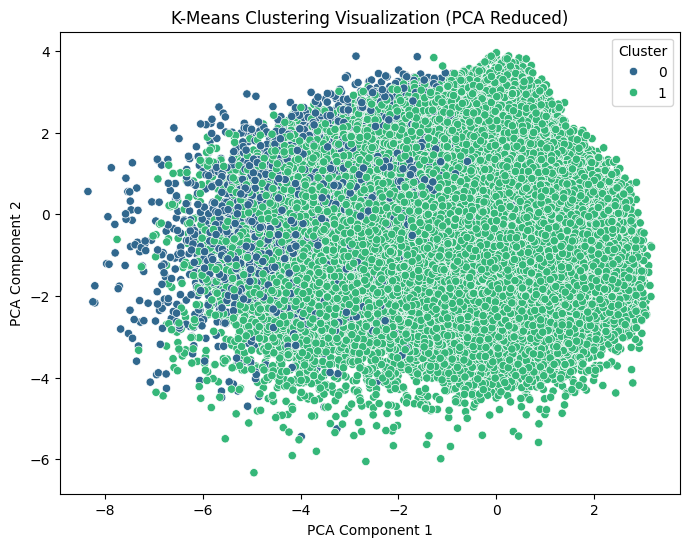

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X_scaled = sc.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters if needed
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = kmeans.labels_

# Print the number of samples in each cluster
print("Cluster Distribution:")
print(df["Cluster"].value_counts())

# Visualize the Clusters using PCA (reduce dimensions to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", 
    y="PCA2", 
    hue="Cluster", 
    palette="viridis", 
    data=pca_df, 
    legend="full"
)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# hmm, I was thinking that there is less overlap

In [ ]:
# confusion matrix

# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)
print(confusion_matrix(y_test, predictions))

# the best confusion matrix compared to others
# because even it shows some false prediction
# it shows better results than in Random Forest
# and better results than in own mande neural networks

[[46105   110]
 [ 3527   147]]


In [ ]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])


# for some reasons this metric is quite low
# but it still more than 0.5 and it means
# that the predictions are more or less correct

0.5557408687505021

In [24]:
import pickle

# Save the model to a file
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(logmodel, file)
print("Model saved successfully!")

Model saved successfully!


In [27]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [28]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
1,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
2,0,31.64,1,0,0,5,0,1,0,80,0,2,0,2,9,1,0,0
3,0,28.37,1,0,0,0,0,1,1,77,0,2,1,3,8,0,0,0
4,0,28.15,0,0,0,7,0,1,0,80,0,0,0,2,7,0,0,0


In [35]:
# let's try with some new imaginary data
# modify this as needed regarding your own dataset
# Gender -> 0 => Female, 1 => Male
tester_row = {
    'BMI': 20.34, 
    'Smoking': 0, 
    'AlcoholDrinking': 0,  
    'Stroke': 0, 
    'PhysicalHealth': 0, 
    'MentalHealth': 0,
    'DiffWalking': 0,
    'Sex': 0, 
    'AgeCategory': 0,
    'Race': 0, 
    'Diabetic': 0,
    'PhysicalActivity': 1, 
    'GenHealth': 0, 
    'SleepTime': 0,  
    'Asthma': 0, 
    'KidneyDisease': 0,
    'SkinCancer': 0
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print("No and Yes:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Does the person has a Heart Disease? (No/Yes):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)

All probabilities by category:
No and Yes:
[[0.98972844 0.01027156]]

Does the person has a Heart Disease? (No/Yes):
No
